<a href="https://colab.research.google.com/github/AnnaKraim/ML/blob/main/communities_regular_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Будем работать с [датасетом](http://archive.ics.uci.edu/ml/datasets/communities+and+crime) районов и преступлений

In [ ]:
df = pd.read_csv('communities.csv')

In [ ]:
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.030000,0.130000,0.960000,0.170000,0.060000,0.180000,0.440000,0.130000,0.940000,0.930000,0.03000,0.070000,0.100000,0.070000,0.020000,0.57000,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,0.726959,0.22047,0.134859,0.114859,0.259185,0.075549,0.55605,0.305987,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


In [ ]:
X = df.drop(columns=['ViolentCrimesPerPop'])
y = df['ViolentCrimesPerPop']

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X, y)

y_pred = lr.predict(X)



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mean_squared_error(y, y_pred), r2_score(y, y_pred)

(0.01628404859086054, 0.6998594398258421)

Получили неплохие результаты, попробуем сравнить с результатами на отложенной (test/train) выборке

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("Train MSE = ", mean_squared_error(y_train, y_train_pred), "R2 = ", r2_score(y_train, y_train_pred))
print("Test MSE = ", mean_squared_error(y_test, y_test_pred), "R2 = ", r2_score(y_test, y_test_pred))


Train MSE =  0.016359323496169555 R2 =  0.7077032946793707
Test MSE =  2.490138802302624 R2 =  -50.21181514863974


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

cross_val_score(LinearRegression(), X, y, cv = KFold(shuffle=True,  random_state=42))

array([-43.79936365,   0.66122234,   0.61753157,   0.67507942,
         0.5872835 ])

WTF IS GOING ON ? ? ?? ? ? ? ?? 

Давайте посмотрим на коофициенты линейной модели

In [ ]:
# populartion, houseHoldSize, race, ..., PolicBudgPerPop
# 2.52, 1.31, 1.95, ..., 1

w = pd.DataFrame(np.array([X.columns, lr.coef_]).T, columns=['feature', 'w'])
w_sorted = w.sort_values(by='w')



In [ ]:
w_sorted.head(10)

,feature,w
103,PolicPerPop,-3498.28
96,LemasSwornFT,-0.995402
41,TotalPctDiv,-0.849737
98,LemasSwFTFieldOps,-0.661463
10,numbUrban,-0.450291
67,PctPersOwnOccup,-0.430222
21,whitePerCap,-0.424546
121,PolicBudgPerPop,-0.369006
59,PctRecImmig10,-0.329229
65,PersPerOwnOccHous,-0.303043


In [ ]:
w_sorted.tail(10)

,feature,w
0,population,0.252187
102,PolicReqPerOffic,0.254372
85,MedRent,0.296184
19,medFamInc,0.320273
40,FemalePctDiv,0.333785
117,PolicOperBudg,0.401312
58,PctRecImmig8,0.462543
38,MalePctDivorce,0.581156
64,PersPerOccupHous,0.715068
97,LemasSwFTPerPop,3498.8


LemasSwFTPerPop	3498.8

PolicPerPop	-3498.28

In [ ]:
X['LemasSwFTPerPop'].corr(X['PolicPerPop'])

0.9999938757673811

In [ ]:
X_fixed = X.drop(columns=['LemasSwFTPerPop'])

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

cross_val_score(LinearRegression(), X_fixed, y, cv = KFold(shuffle=True,  random_state=42)).mean()

0.6332027476317412

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fixed, y, test_size=0.25, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("Train MSE = ", mean_squared_error(y_train, y_train_pred), "R2 = ", r2_score(y_train, y_train_pred))
print("Test MSE = ", mean_squared_error(y_test, y_test_pred), "R2 = ", r2_score(y_test, y_test_pred))


Train MSE =  0.016496962952818123 R2 =  0.7052440511959883
Test MSE =  0.017660143995183897 R2 =  0.636804169734067


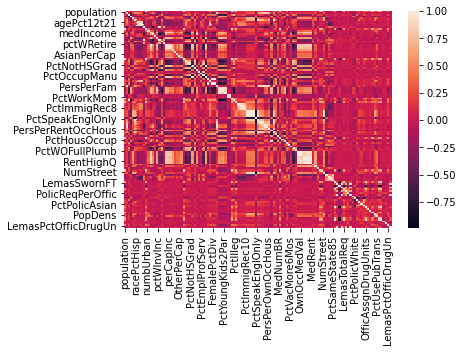

In [ ]:
import seaborn as sns
sns.heatmap(X.corr())

In [ ]:
X_corr = X.corr()

In [ ]:
for i, row in X_corr.iterrows():
  filtered = row[(row > 0.95) | (row < -0.95)]
  filtered = filtered.drop(i)
  if len(filtered) > 0:
    print(i, ":", filtered.index, filtered.values)


population : Index(['numbUrban'], dtype='object') [0.99311243]
numbUrban : Index(['population'], dtype='object') [0.99311243]
medIncome : Index(['medFamInc'], dtype='object') [0.97761582]
medFamInc : Index(['medIncome'], dtype='object') [0.97761582]
perCapInc : Index(['whitePerCap'], dtype='object') [0.97024652]
whitePerCap : Index(['perCapInc'], dtype='object') [0.97024652]
PctBSorMore : Index(['PctOccupMgmtProf'], dtype='object') [0.95281908]
PctOccupMgmtProf : Index(['PctBSorMore'], dtype='object') [0.95281908]
MalePctDivorce : Index(['TotalPctDiv'], dtype='object') [0.97572552]
FemalePctDiv : Index(['TotalPctDiv'], dtype='object') [0.9832168]
TotalPctDiv : Index(['MalePctDivorce', 'FemalePctDiv'], dtype='object') [0.97572552 0.9832168 ]
PctFam2Par : Index(['PctKids2Par'], dtype='object') [0.98535803]
PctKids2Par : Index(['PctFam2Par'], dtype='object') [0.98535803]
PctRecentImmig : Index(['PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10'], dtype='object') [0.98899854 0.97796421 0.9664

In [ ]:
X_fixed_again = X.drop(columns=['numbUrban', 'medFamInc', 'whitePerCap', 'PctBSorMore', 'TotalPctDiv', 'PctFam2Par', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctLargHouseFam', 'OwnOccMedVal', 'RentMedian', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'PolicOperBudg'])

In [ ]:
cross_val_score(LinearRegression(), X_fixed_again, y).mean()

0.6460639499338889

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
vts = VarianceThreshold(0.01)
X_var_trash = vts.fit_transform(X)
X_var_trash.shape, X.shape

((1994, 100), (1994, 122))

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.0001)

In [ ]:
lasso.fit(X, y)
lasso.coef_

array([-0.        ,  0.        ,  0.17455106, -0.03313473, -0.01037338,
        0.04347053,  0.        , -0.16770628,  0.        ,  0.00598423,
       -0.00973308,  0.03640668,  0.        , -0.12314892,  0.02836895,
       -0.12025922,  0.04229727,  0.        , -0.08512479,  0.01131154,
        0.        , -0.08266289, -0.0184041 , -0.02731627,  0.02650322,
        0.04009094,  0.02384065, -0.        , -0.1368626 , -0.03922306,
        0.        ,  0.02023364, -0.00983259,  0.09950837, -0.03359575,
        0.        ,  0.01529342,  0.        ,  0.12499242,  0.121065  ,
       -0.0675251 , -0.        ,  0.        , -0.        , -0.25842138,
       -0.0421956 , -0.        ,  0.        , -0.11118202, -0.03534314,
        0.159035  , -0.10091204,  0.00175706, -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.01986457,  0.        ,
       -0.        , -0.07444192, -0.06053392, -0.        ,  0.10485828,
       -0.0112153 , -0.00272418, -0.04304428,  0.13137008,  0.04

In [ ]:
cross_val_score(Lasso(alpha=0.0001), X, y).mean()

0.6544824432966206

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
selector = SelectFromModel(Lasso(alpha=0.0005), threshold=0.0000001)

In [ ]:
X_lasso = selector.fit_transform(X, y)

In [ ]:
X_lasso.shape, X.shape

((1994, 32), (1994, 122))

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
r = Ridge()
cross_val_score(Ridge(10), X_lasso, y).mean()

0.6599432179214322

Задача: перебрать alpha-параметр для Ridge-регрессии

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': np.arange(1, 10, 0.1), 'normalize': [False, True]}


gcv = GridSearchCV(Ridge(), params, n_jobs=-1)

gcv.fit(X_lasso, y)



GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'normalize': [False, True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gcv.best_score_, gcv.best_params_

(0.6603300638726465, {'alpha': 5.5000000000000036, 'normalize': False})

Pipeline - последовательность шагов: Данные поступают в первый элемент списка, после этого выполняется fit, transform/predict и передаются на вход следующему шагу

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
                 ('selector', SelectFromModel(Lasso(0.00001))), 
                 ('regression', Ridge(2.0))
                 ])


In [ ]:
cross_val_score(pipe, X, y).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07024482547138788, tolerance: 0.008730651373040748
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6658196487069876, tolerance: 0.008256076589341695
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5474745797504035, tolerance: 0.008517425554858937
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

0.6556716648070328

In [ ]:
params = {
    'selector__estimator__alpha': np.arange(0, 0.1, 0.001),
    'regression__alpha': np.arange(1, 10, 0.1),

}

In [ ]:
from sklearn.model_selection import GridSearchCV


gcv = GridSearchCV(pipe, params, n_jobs=-1, verbose=10)

gcv.fit(X, y)



Fitting 5 folds for each of 9000 candidates, totalling 45000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1760s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0915s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1396s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 262 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 350 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 454 tasks      | elapsed:  

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('selector',
                                        SelectFromModel(estimator=Lasso(alpha=1e-05,
                                                                        copy_X=True,
                                                                        fit_intercept=True,
                                                                        max_iter=1000,
                                                                        normalize=False,
                                                                        positive=False,
                                                                        precompute=False,
                                                                        random_state=None,
                                                                        selection='cyclic',
                                                                 

In [ ]:
gcv.best_score_, gcv.best_params_

(0.6556066620713548,
 {'regression__alpha': 2.5000000000000013, 'selector__estimator__alpha': 0.0})